In [1]:
import cv2
import numpy as np
import PIL.Image as Image
from IPython.display import display

In [2]:
flower = cv2.imread('./image/flowerPepper.jpg')

In [3]:
flower.shape

(600, 800, 3)

In [4]:
flower_gray = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY)

In [5]:
flower_gray.shape

(600, 800)

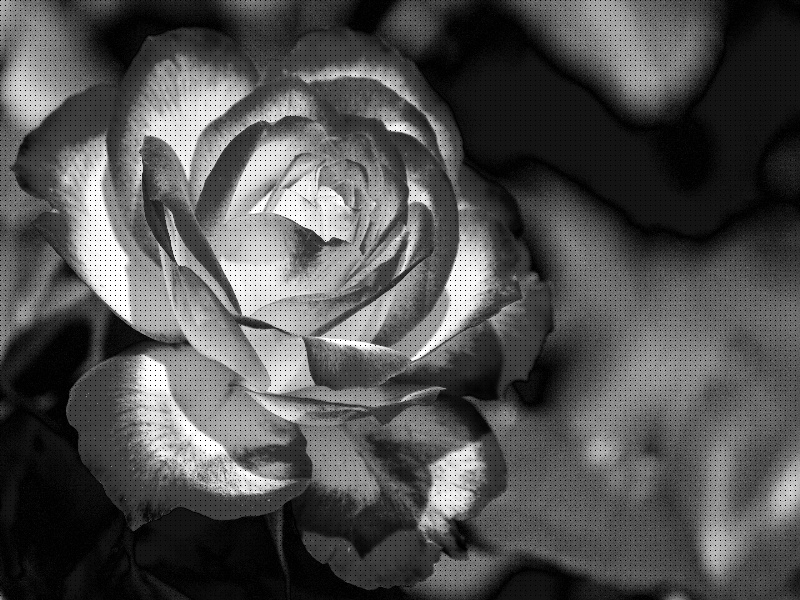

In [6]:
display(Image.fromarray(flower_gray))

In [7]:
filter = np.array([(1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1)]) * (1/25)

In [8]:
image_shape = flower_gray.shape
filter_shape = filter.shape

In [9]:
row = image_shape[0] + filter_shape[0] - 1
col = image_shape[1] + filter_shape[1] - 1
new_img_arr = np.zeros((row, col))

In [10]:
new_img_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        new_img_arr[i + int((filter_shape[0] - 1) // 2), j + int((filter_shape[1] - 1) // 2)] = flower_gray[i, j]

In [12]:
new_img_arr

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   5.,   0.,   0.],
       ...,
       [  0.,   0., 145., ...,  46.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

# Arithmetic mean filter

In [13]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.sum(temp * filter)
        flower_gray[i, j] = res

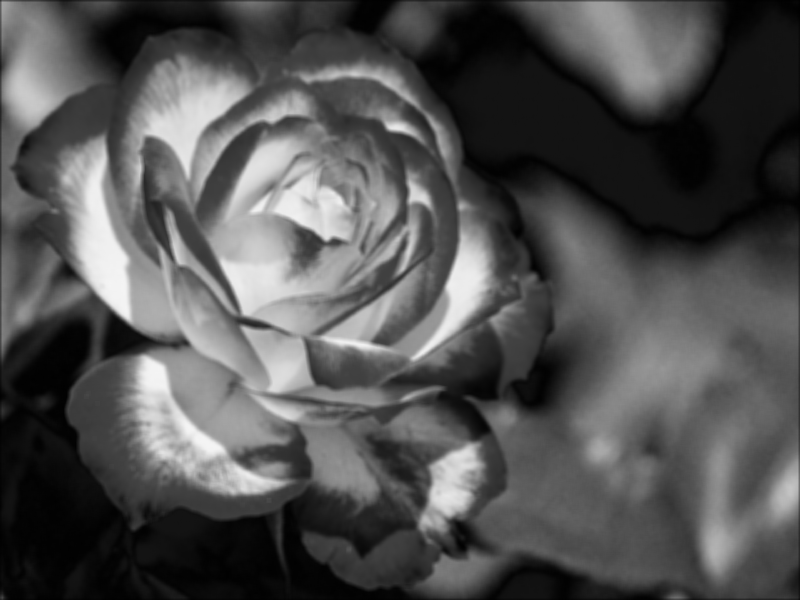

In [14]:
display(Image.fromarray(flower_gray))

# Geometric mean filter

In [15]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.prod(temp ** filter)
        flower_gray[i, j] = res

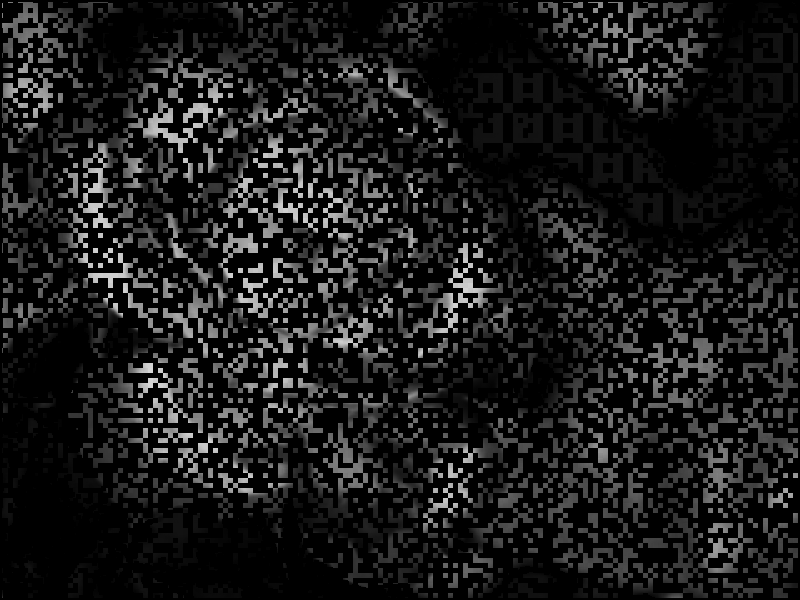

In [16]:
display(Image.fromarray(flower_gray))

# Harmonic mean filter

In [17]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = (filter_shape[0] * filter_shape[1]) // np.sum(np.reciprocal(temp))
        flower_gray[i, j] = res

C:\Users\levan\.conda\envs\nt4rever\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in reciprocal
  after removing the cwd from sys.path.


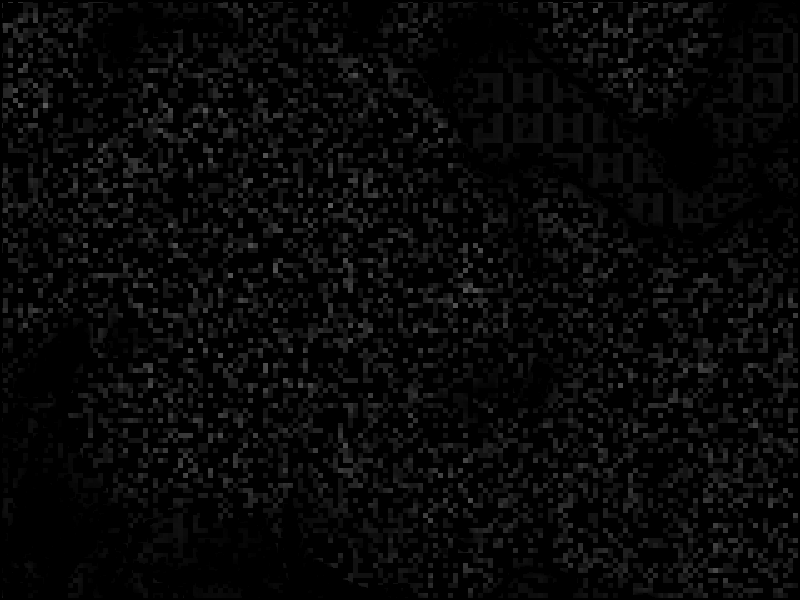

In [18]:
display(Image.fromarray(flower_gray))

# Contraharmonic mean filter

In [19]:
Q = -0.5
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = (np.sum(temp ** (Q + 1))) // (np.sum(temp ** Q))
        flower_gray[i, j] = res

C:\Users\levan\.conda\envs\nt4rever\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


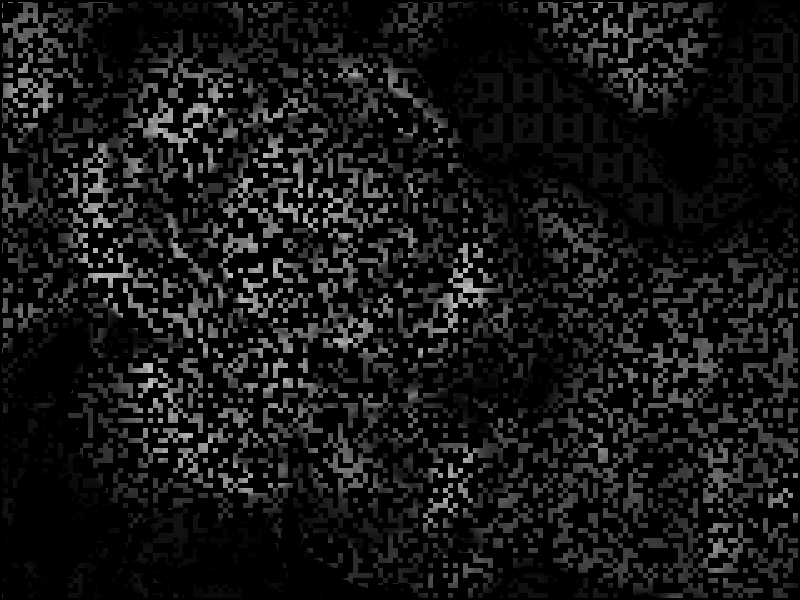

In [20]:
display(Image.fromarray(flower_gray))

# Order-statistic filters

## Median filter

In [21]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.median(temp)
        flower_gray[i, j] = res

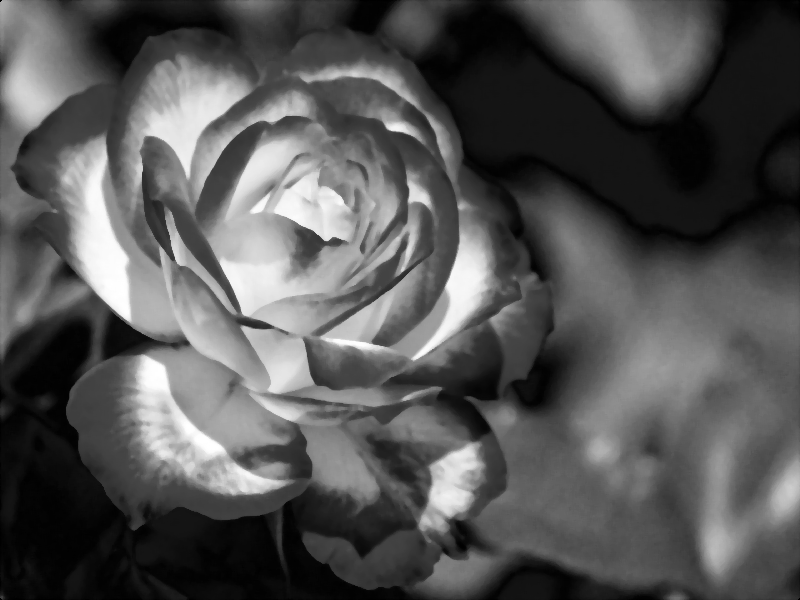

In [22]:
display(Image.fromarray(flower_gray))

# Max - min filter

In [23]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.amax(temp)
        flower_gray[i, j] = res

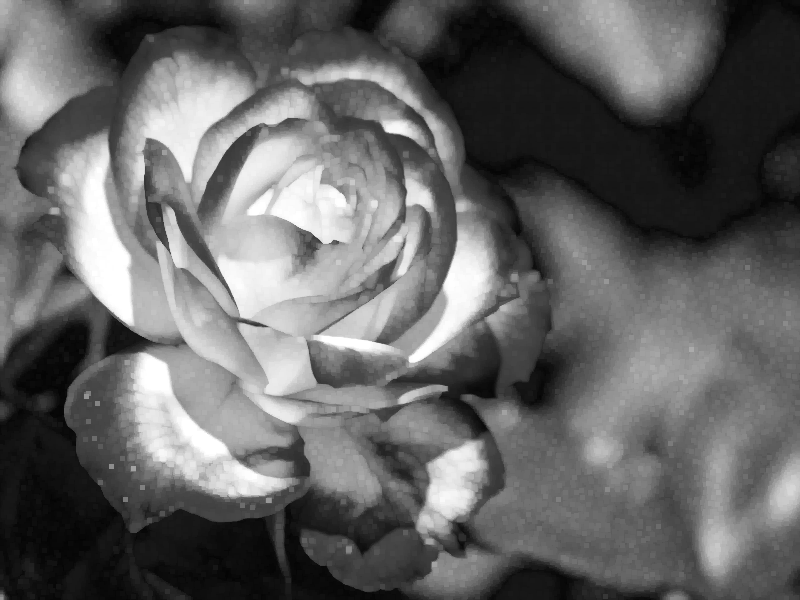

In [24]:
display(Image.fromarray(flower_gray))

In [25]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.amin(temp)
        flower_gray[i, j] = res

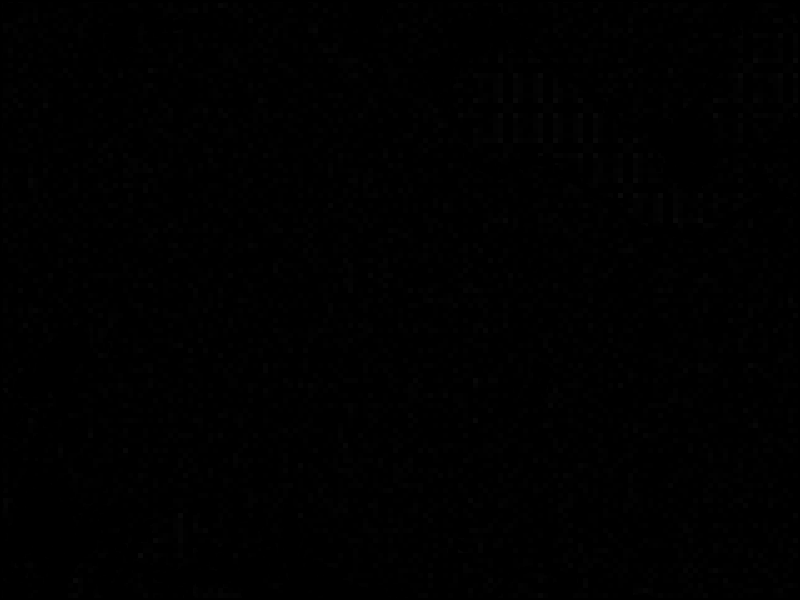

In [26]:
display(Image.fromarray(flower_gray))

# Midpoint filter

In [27]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.amax(temp * (1/2)) + np.amin(temp * (1/2))
        flower_gray[i, j] = res

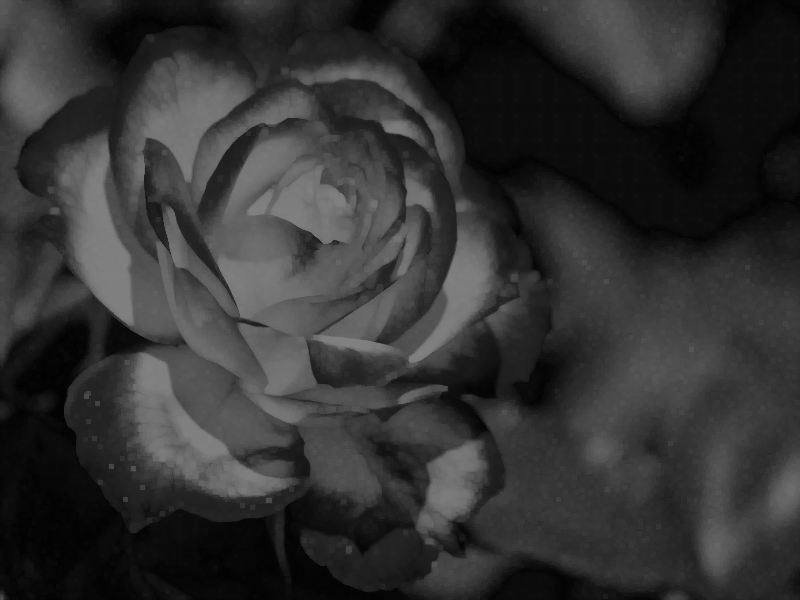

In [28]:
display(Image.fromarray(flower_gray))

# Alpha-trimmed mean filter

In [29]:
d = 2
filter = np.array([(1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1)]) * (1/25)

In [30]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]].copy()
        # max
        indices = temp.argpartition(temp.size - (d//2), axis = None)[-(d//2):]
        x, y = np.unravel_index(indices, temp.shape)
        temp[x, y] = 0
        
        # min
        indices = temp.argpartition(temp.size - (d//2), axis = None)[:(d//2)]
        x, y = np.unravel_index(indices, temp.shape)
        temp[x, y] = 0
        
        res = np.sum(temp * filter)
        flower_gray[i, j] = res

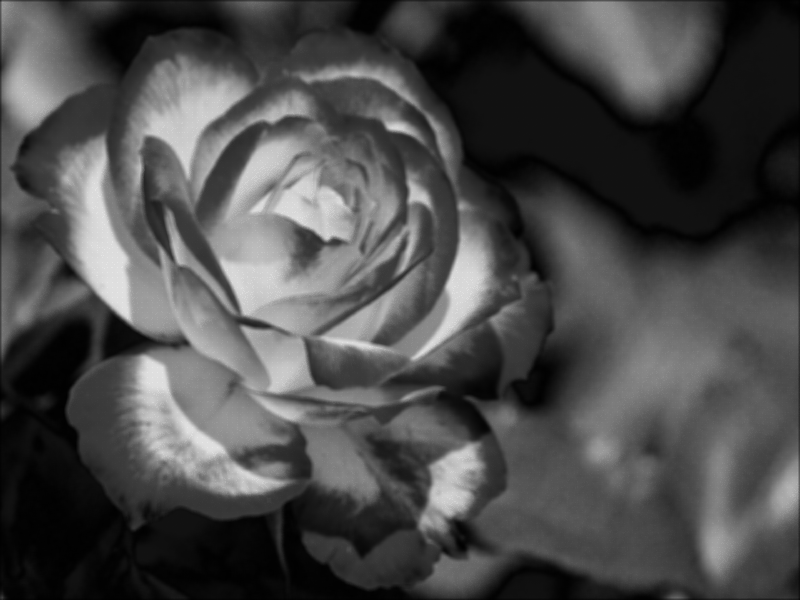

In [31]:
display(Image.fromarray(flower_gray))

# Adaptive filters

In [32]:
local_var = np.zeros((image_shape[0], image_shape[1]))
local_mean = np.zeros((image_shape[0], image_shape[1]))

for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        local_mean[i, j] = np.mean(temp)
        local_var[i, j] = np.mean(temp ** 2) - (local_mean[i, j] ** 2)     

In [33]:
local_var

array([[6552.8896, 7357.04  , 7259.9584, ...,   24.9504,   23.2   ,
          17.3504],
       [7262.8096, 7054.1024, 5311.8464, ...,   22.5664,   25.2064,
          21.8944],
       [7284.64  , 5375.8816, 1138.88  , ...,   15.6   ,   21.4784,
          20.5024],
       ...,
       [2512.3584, 2011.3184, 1446.0704, ...,  129.6064,  376.0096,
         500.64  ],
       [2703.8944, 2332.6144, 1884.1216, ...,  397.12  ,  541.5136,
         529.9616],
       [2705.0816, 2538.4064, 2293.0176, ...,  609.8976,  620.2496,
         519.9936]])

In [34]:
local_mean

array([[ 55.52,  76.  ,  96.04, ...,   4.64,   3.8 ,   2.64],
       [ 75.48, 102.76, 129.44, ...,   6.56,   5.44,   3.84],
       [ 96.2 , 130.28, 163.4 , ...,   7.4 ,   5.96,   4.24],
       ...,
       [ 51.04,  59.04,  65.64, ...,  44.44,  36.52,  26.8 ],
       [ 46.84,  54.16,  60.28, ...,  38.  ,  30.08,  21.72],
       [ 37.28,  43.56,  48.68, ...,  29.68,  23.52,  16.92]])

In [35]:
noise_var = np.sum(local_var) // len(local_var)
noise_var

445293.0

In [36]:
local_var = np.maximum(noise_var, local_var)

In [37]:
flower_gray = flower_gray - np.multiply((noise_var / local_var), (flower_gray - local_mean))


In [38]:
flower_gray = flower_gray.astype(np.uint8)

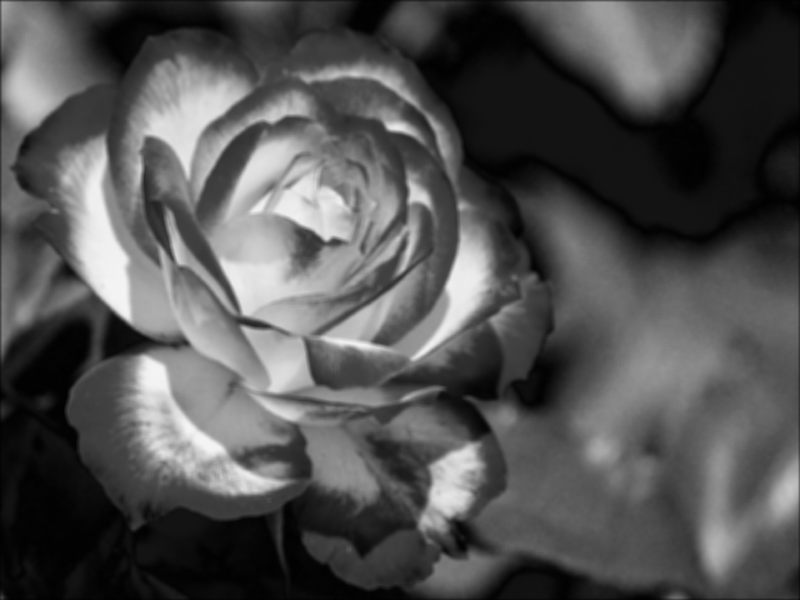

In [39]:
display(Image.fromarray(flower_gray))